**Use yfinance to extract historical data**

In [20]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm

**Define Portfolio**

In [21]:
tickers = ['SPY', 'QQQ']
weights = np.array([0.5, 0.5])

**Build a Portfolio**

In [22]:
start = dt.datetime(2023, 1, 1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']
df

[*********************100%%**********************]  2 of 2 completed


Ticker,QQQ,SPY
Date,,
2023-01-03,261.902039,372.754272
2023-01-04,263.149750,375.632019
2023-01-05,259.030334,371.344727
2023-01-06,266.179932,379.860474
2023-01-09,267.902985,379.645142
...,...,...
2024-07-29,463.899994,544.760010
2024-07-30,457.529999,542.000000
2024-07-31,471.070007,550.809998


**Calculate Daily Retruns**

In [23]:
returns = df.pct_change()
returns

Ticker,QQQ,SPY
Date,,
2023-01-03,NaN,NaN
2023-01-04,0.004764,0.007720
2023-01-05,-0.015654,-0.011414
2023-01-06,0.027601,0.022932
2023-01-09,0.006473,-0.000567
...,...,...
2024-07-29,0.002009,0.000588
2024-07-30,-0.013731,-0.005066
2024-07-31,0.029594,0.016255


**Calculate Variance-Covariance Matrix**

In [24]:
cov_matrix = returns.cov()
cov_matrix

Ticker,QQQ,SPY
Ticker,,
QQQ,0.000124,0.000081
SPY,0.000081,0.000063


**Calculate Expected Returns (Mean)**

In [25]:
avg_returns = returns.mean()
avg_returns

,0
Ticker,
QQQ,0.001419
SPY,0.000932


**Calculate Number of Observations (Rows)**

In [26]:
count = returns.count()[0]
count

<ipython-input-26-7e2abb000c99>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = returns.count()[0]


397

# **Construct Normal Distribution Curve**

In [27]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)

**Calculate Portfolio Mean**

In [28]:
port_mean

0.0011754653880000957

**Calcuulate Portfolio Standard Deviation**

In [29]:
port_std

0.00933866522299944

**Create a Normal Distribution Curve**

<function matplotlib.pyplot.show(close=None, block=None)>

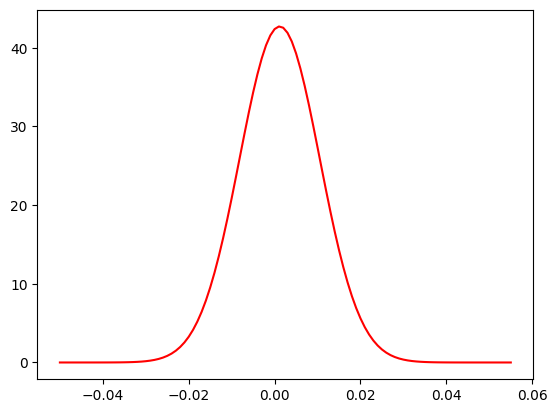

In [31]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, port_mean, port_std)

plt.plot(x,norm_dist,color='r')
plt.show

**Calculate VaR at 95% Confidence Level**

In [ ]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, port_mean, port_std)
VaR

-0.037275322743543275

Calculate 10-day VaR

In [ ]:
num_days = 10

VaR * np.sqrt(num_days)

-0.11787492038747321

**Calculate Confidence Interval**

In [ ]:
lower = port_mean - 2* port_std / np.sqrt(count)

lower

-0.016309320514837286

In [ ]:
higher = port_mean + 2* port_std / np.sqrt(count)
higher

0.0050268423087281655